# YOLO 8을 이용한 객체 검출 모델

- colab에서 실행하며 GPU를 사용

## YOLO8 설치
- 객체 검출을 수행하는 공개 모델

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 7.7 MB/s eta 0:00:00


In [ ]:
import ultralytics

In [ ]:
# 샘플 이미지 다운로드
!curl -L -o animal1.jpg https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEifUMi8Kv_o3zyTFitQYTyLkCRYnkRCYdkXgcLwyMQuWb7Sxcy5t-4zjXcpwEIuyJUbxd-3-sSrTmbirwMq1nVvaMxXGpVNYEa14hEle1uBfQWxVkg9o7VVklIhiYU3McSfdmX8wWTutNQka0haQJ081rLrU1RZSrF2qTwPhgbCI__X7rhhdO58Miex/s1024/ny.webp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  239k  100  239k    0     0   183k      0  0:00:01  0:00:01 --:--:--  183k


# 또는 PC에서 업로드

In [ ]:
from glob import glob
files =  glob('/content/*.jpg')
files

['/content/animal1.jpg']

# 이미지 보기

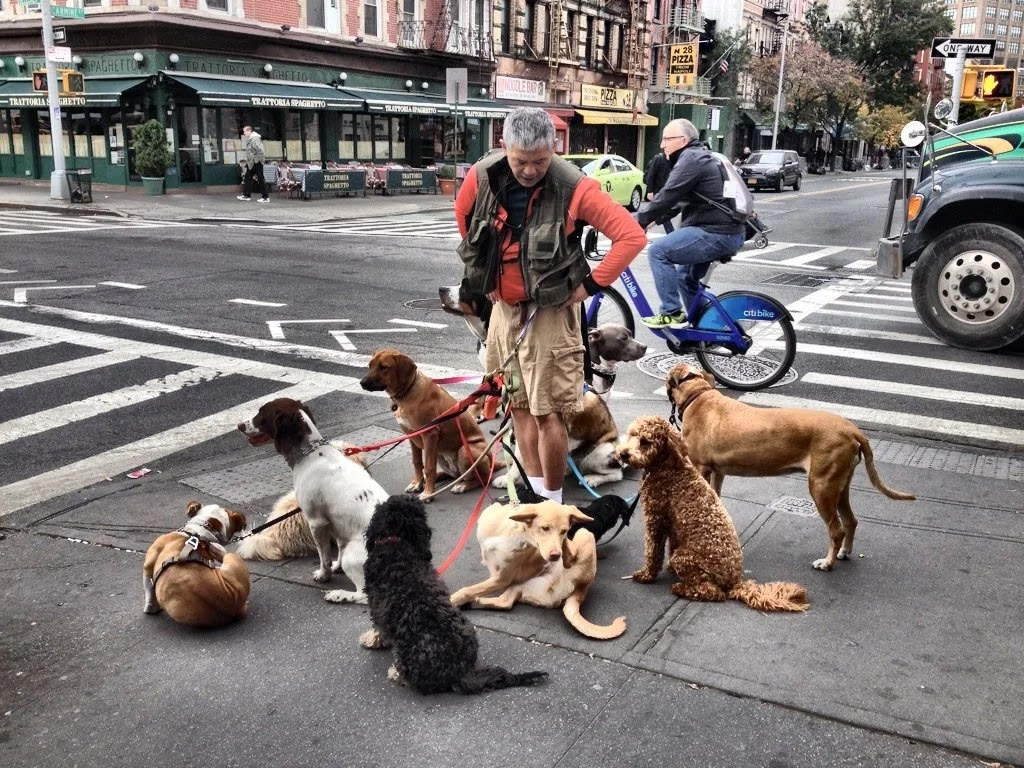

In [ ]:
from PIL import Image
for file in files:
  with Image.open(file) as f:
    display(f)

# 모델 선택

In [ ]:
# 모델 불러오기
from ultralytics import YOLO
model = YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 332MB/s]


# 모델 실행 (객체 검출)

In [ ]:
results = model(source='/content/*.jpg', save=True)


image 1/1 /content/animal1.jpg: 480x640 4 persons, 1 bicycle, 2 cars, 1 truck, 10 dogs, 1 potted plant, 204.3ms
Speed: 13.3ms preprocess, 204.3ms inference, 31.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


## 결과 보기 [매뉴얼](https://docs.ultralytics.com/reference/engine/results/)

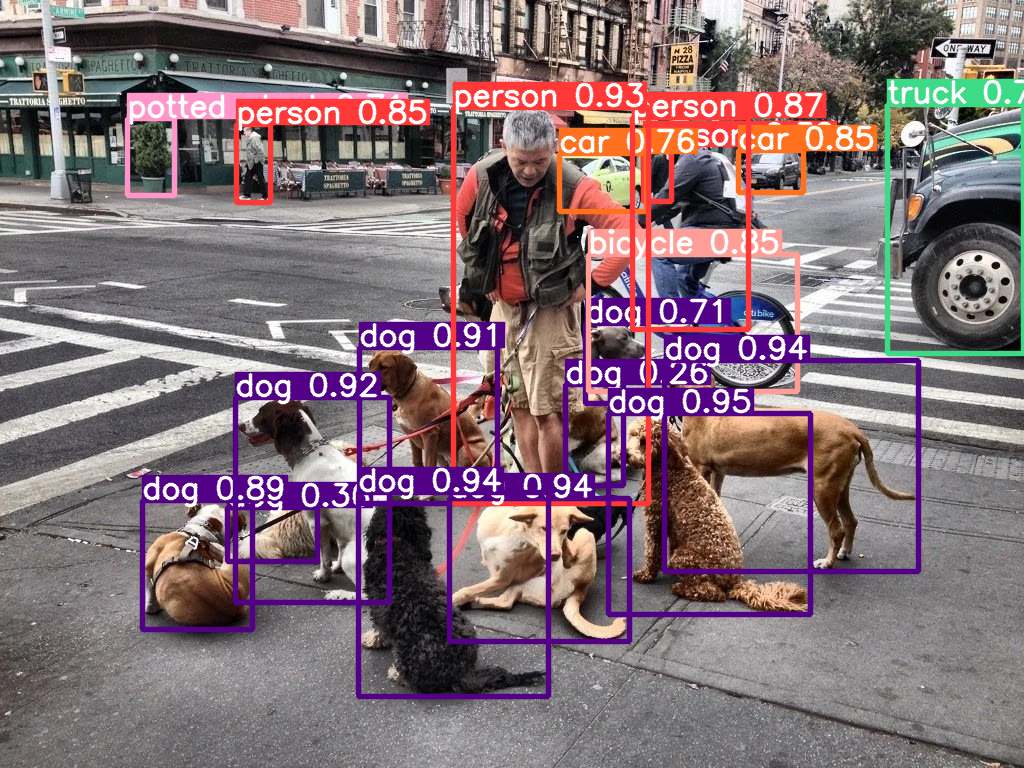

In [ ]:
for r in results:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
    display(im)

In [ ]:
import numpy as np

for result in results:

    uniq, cnt = np.unique(result.boxes.cls.cpu().numpy(), return_counts=True)  # Torch.Tensor -> numpy
    uniq_cnt_dict = dict(zip(uniq, cnt))

    print('\n{class num:counts} =', uniq_cnt_dict,'\n')

    for c in result.boxes.cls:
        print('class num =', int(c), ', class_name =', model.names[int(c)])


{class num:counts} = {0.0: 4, 1.0: 1, 2.0: 2, 7.0: 1, 16.0: 10, 58.0: 1} 

class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 0 , class_name = person
class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 0 , class_name = person
class num = 1 , class_name = bicycle
class num = 0 , class_name = person
class num = 2 , class_name = car
class num = 2 , class_name = car
class num = 7 , class_name = truck
class num = 58 , class_name = potted plant
class num = 16 , class_name = dog
class num = 16 , class_name = dog
class num = 0 , class_name = person
class num = 16 , class_name = dog


In [ ]:
results[0].boxes.xyxy

tensor([[ 608.9835,  413.7280,  810.9821,  614.1345],
        [ 664.1205,  360.8595,  918.6411,  571.8784],
        [ 358.4783,  492.7920,  548.7415,  696.9504],
        [ 449.1079,  498.5112,  629.2294,  641.9222],
        [ 453.1985,  107.7675,  648.1407,  503.7338],
        [ 235.4136,  397.7615,  389.6310,  602.1279],
        [ 359.2630,  347.8124,  497.4233,  503.5952],
        [ 142.4848,  500.6205,  252.1643,  629.4117],
        [ 632.3421,  117.8144,  748.3091,  329.8383],
        [ 588.7723,  254.2399,  797.0512,  391.2520],
        [ 236.0417,  124.0320,  270.5583,  202.7260],
        [ 738.9184,  150.3016,  803.9252,  192.4485],
        [ 559.2414,  153.8447,  646.1676,  211.1721],
        [ 887.9772,  104.5823, 1023.5963,  353.6252],
        [ 127.6741,  118.4349,  174.6007,  195.2404],
        [ 585.2770,  323.2742,  647.5530,  403.8577],
        [ 227.5841,  507.1161,  317.8199,  561.3828],
        [ 643.6144,  146.0266,  671.5306,  201.2719],
        [ 565.8600,  384.728

In [ ]:
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou